In [243]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, f1_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [150]:
!gdown --id 1PY0cG1u96UAKY563Gt8bzA3tuTA4SRyN

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [151]:
! unzip spotify_dataset.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [152]:
# load the data into a dataframe
df = pd.read_csv("dataset.csv", index_col=[0])

In [153]:
# use the shape property to find (rows, columns)
print('There are {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

There are 114000 rows and 20 columns.


In [154]:
#view samples of the data
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [155]:
# use dtypes prooperty to find the data type of each column
print(df.dtypes)

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


We can see there are a couple columns which the data type should be changed.

- track_id should be a integer
- artists should be string
- album_name should be string
- track_name should be string
- track_genre should be string

In [156]:
# find the amount of missing data in each column
print(df.isnull().sum())

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [157]:
#count the frequency of missing values in each row (i.e. how many columns are empty)
df.isnull().sum(axis=1).sort_values(ascending = False)

65900     3
0         0
75997     0
76008     0
76007     0
         ..
37995     0
37994     0
37993     0
37992     0
113999    0
Length: 114000, dtype: int64

Out of 114000 rows, only one row have missing data for "artists", "album_name", and "track_name", so we can simply drop that row.

In [158]:
# delete the row with missing data
df = df.dropna()

In [159]:
#remove any duplicate rows (each of the row must be unique - duplication is not allowed)
df.drop_duplicates(inplace=True)

In [160]:
# check for invalid data
df.describe(include='all')

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
count,113549,113549,113549,113549,113549.000000,1.135490e+05,113549,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549
unique,89740,31437,46589,73608,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acoustic
freq,9,279,195,151,NaN,NaN,103831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,NaN,NaN,NaN,NaN,33.324433,2.280814e+05,NaN,0.567031,0.642091,5.309452,-8.243408,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218,NaN
std,NaN,NaN,NaN,NaN,22.283855,1.064131e+05,NaN,0.173409,0.251053,3.560147,5.011422,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117,NaN
min,NaN,NaN,NaN,NaN,0.000000,8.586000e+03,NaN,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,17.000000,1.741840e+05,NaN,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000,NaN
50%,NaN,NaN,NaN,NaN,35.000000,2.130000e+05,NaN,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000,NaN
75%,NaN,NaN,NaN,NaN,50.000000,2.615880e+05,NaN,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000,NaN


There does not seem to be invalid data in the dataset. But one thing we should do to prepare the dataset for analysis later is to convert popularity column to be out of 1 instead of 100. Because that is what the other measures are out of (danceability, energy, speechiness, etc).

In [161]:
df['popularity'] = df['popularity'].div(100)


In [162]:
df['popularity'].value_counts()

0.00    15843
0.22     2347
0.21     2331
0.44     2288
0.01     2116
        ...  
0.96        7
0.94        7
0.95        5
1.00        2
0.99        1
Name: popularity, Length: 101, dtype: int64

In [163]:
# check to see if things have been fixed
df.describe(include='all')

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
count,113549,113549,113549,113549,113549.000000,1.135490e+05,113549,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549
unique,89740,31437,46589,73608,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acoustic
freq,9,279,195,151,NaN,NaN,103831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,NaN,NaN,NaN,NaN,0.333244,2.280814e+05,NaN,0.567031,0.642091,5.309452,-8.243408,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218,NaN
std,NaN,NaN,NaN,NaN,0.222839,1.064131e+05,NaN,0.173409,0.251053,3.560147,5.011422,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117,NaN
min,NaN,NaN,NaN,NaN,0.000000,8.586000e+03,NaN,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,0.170000,1.741840e+05,NaN,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000,NaN
50%,NaN,NaN,NaN,NaN,0.350000,2.130000e+05,NaN,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000,NaN
75%,NaN,NaN,NaN,NaN,0.500000,2.615880e+05,NaN,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000,NaN


In [164]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0.73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0.71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,0.82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [165]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113549.000000,1.135490e+05,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,0.333244,2.280814e+05,0.567031,0.642091,5.309452,-8.243408,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218
std,0.222839,1.064131e+05,0.173409,0.251053,3.560147,5.011422,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.170000,1.741840e+05,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000
50%,0.350000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,0.500000,2.615880e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000
max,1.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


## Encode and Transformation


In [166]:
classified = df.copy(deep=False)
df['pop_rating'] = ''
for i, row in classified.iterrows():
    score = 'unpopular'
    if (row.popularity > .50) & (row.popularity < .65):
        score = 'medium'
    elif (row.popularity > .35) & (row.popularity < .50):
        score = 'somewhat_popular'
    elif (row.popularity > .65) & (row.popularity < .80):
        score = 'popular'
    elif row.popularity >= .75:
        score = 'more_popular'
    df.at[i, 'pop_rating'] = score
    

In [198]:
df['pop_rating']

0                  popular
1                   medium
2                   medium
3                  popular
4             more_popular
                ...       
113995           unpopular
113996           unpopular
113997           unpopular
113998    somewhat_popular
113999           unpopular
Name: pop_rating, Length: 113549, dtype: object

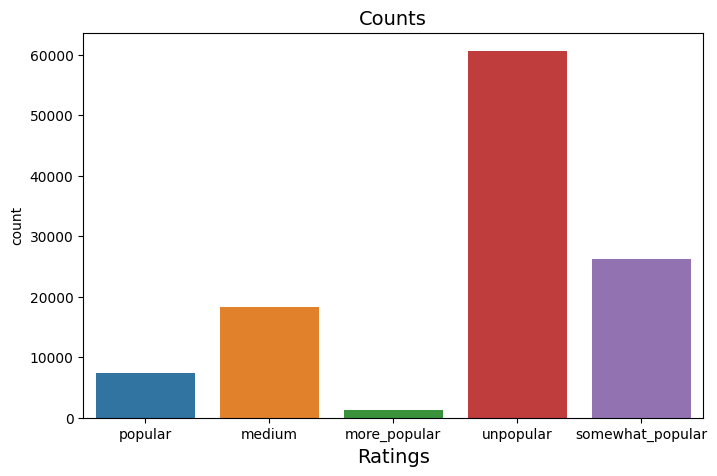

In [219]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(8,5))
_ = sns.countplot(x='pop_rating', data=df)
_ = plt.xlabel('Ratings', fontsize=14)
_ = plt.title('Counts', fontsize=14)

In [169]:
df["duration_mins"] = df["duration_ms"]/60000


In [170]:
df['duration_mins']

0         3.844433
1         2.493500
2         3.513767
3         3.365550
4         3.314217
            ...   
113995    6.416650
113996    6.416667
113997    4.524433
113998    4.731550
113999    4.030433
Name: duration_mins, Length: 113549, dtype: float64

Prepare our feature list, X

In [180]:
#X = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
X = df[['danceability', 'energy', 'speechiness', 'acousticness', 'mode', 'instrumentalness', 'liveness', 'loudness',  'valence', 'key', 'duration_mins', 'tempo', 'time_signature']]
y = df['popularity']

In [181]:
X.head()

,danceability,energy,speechiness,acousticness,mode,instrumentalness,liveness,loudness,valence,key,duration_mins,tempo,time_signature
0,0.676,0.4610,0.1430,0.0322,0,0.000001,0.3580,-6.746,0.715,1,3.844433,87.917,4
1,0.420,0.1660,0.0763,0.9240,1,0.000006,0.1010,-17.235,0.267,1,2.493500,77.489,4
2,0.438,0.3590,0.0557,0.2100,1,0.000000,0.1170,-9.734,0.120,0,3.513767,76.332,4
3,0.266,0.0596,0.0363,0.9050,1,0.000071,0.1320,-18.515,0.143,0,3.365550,181.740,3
4,0.618,0.4430,0.0526,0.4690,1,0.000000,0.0829,-9.681,0.167,2,3.314217,119.949,4


## Splitting the Data

In [ ]:
X = df[['danceability', 'energy', 'speechiness', 'acousticness', 'mode', 'instrumentalness', 'liveness', 'loudness',  'valence', 'key', 'duration_mins', 'tempo', 'time_signature']]
y = df['pop_rating']
X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.2,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                    shuffle=True
                                                   )
train_enc = ctr.fit_transform(X_train) # Fit and transform column transformer to training data
encoded_column_feature_names = ctr.get_feature_names_out(X.columns) # Get new column names
X_train = pd.DataFrame(train_enc, columns=encoded_column_feature_names) # Recreate X_train to have new encoded columns
test_enc = ctr.fit_transform(X_test) # Fit and transform with column transformer
encoded_column_feature_names = ctr.get_feature_names_out(X.columns) #Get all new feature column names
X_test = pd.DataFrame(test_enc, columns=encoded_column_feature_names) # Create new DataFrame based off these newly transformed columns

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.2,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                    shuffle=True
                                                   )

In [183]:
X_train.describe()

,danceability,energy,speechiness,acousticness,mode,instrumentalness,liveness,loudness,valence,key,duration_mins,tempo,time_signature
count,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000
mean,0.566482,0.642271,0.084760,0.313801,0.637590,0.155885,0.214062,-8.241697,0.473752,5.307511,3.801076,122.223644,3.905646
std,0.173576,0.251179,0.106089,0.332084,0.480699,0.309329,0.190953,5.010492,0.259443,3.561344,1.711484,30.002792,0.429723
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.143100,0.000000,0.000000
25%,0.456000,0.473000,0.035900,0.016500,0.000000,0.000000,0.098000,-9.997000,0.259000,2.000000,2.903100,99.391000,4.000000
50%,0.580000,0.685000,0.049000,0.168000,1.000000,0.000042,0.132000,-6.985000,0.462000,5.000000,3.550267,122.037000,4.000000
75%,0.694000,0.854000,0.084500,0.596000,1.000000,0.048850,0.275000,-4.999000,0.683000,8.000000,4.364667,140.103500,4.000000
max,0.985000,1.000000,0.965000,0.996000,1.000000,1.000000,1.000000,4.532000,0.995000,11.000000,79.817100,243.372000,5.000000


## Transforming and Encoding Training/Test Sets

In [184]:
# Column transformer, to encode and transform specific columns with specific scalers
ctr = ColumnTransformer([('minmax', MinMaxScaler(), ['tempo', 'duration_mins',]), # Scale within min max range
                        ('categorical', OneHotEncoder(), ['key', 'mode', 'time_signature']), # encode categorical data
                        ('std', StandardScaler(), ['instrumentalness', 'liveness', 'speechiness'])], # standardize data since heavily skewed towards 0
                       remainder='passthrough') #remainder can stay the same

### Training Set

In [185]:
train_enc = ctr.fit_transform(X_train) # Fit and transform column transformer to training data
encoded_column_feature_names = ctr.get_feature_names_out(X.columns) # Get new column names
X_train = pd.DataFrame(train_enc, columns=encoded_column_feature_names) # Recreate X_train to have new encoded columns


In [186]:
X_train.describe()

,minmax__tempo,minmax__duration_mins,categorical__key_0,categorical__key_1,categorical__key_2,categorical__key_3,categorical__key_4,categorical__key_5,categorical__key_6,categorical__key_7,...,categorical__time_signature_4,categorical__time_signature_5,std__instrumentalness,std__liveness,std__speechiness,remainder__danceability,remainder__energy,remainder__acousticness,remainder__loudness,remainder__valence
count,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,...,90839.000000,90839.000000,9.083900e+04,9.083900e+04,9.083900e+04,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000
mean,0.502209,0.045912,0.115061,0.093990,0.101884,0.031704,0.079878,0.082079,0.068726,0.115765,...,0.893746,0.016315,-5.862590e-17,-8.068394e-17,-2.581260e-18,0.566482,0.642271,0.313801,-8.241697,0.473752
std,0.123280,0.021481,0.319097,0.291817,0.302497,0.175213,0.271105,0.274487,0.252989,0.319945,...,0.308164,0.126683,1.000006e+00,1.000006e+00,1.000006e+00,0.173576,0.251179,0.332084,5.010492,0.259443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-5.039496e-01,-1.121029e+00,-7.989604e-01,0.000000,0.000000,0.000000,-49.531000,0.000000
25%,0.408391,0.034641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,-5.039496e-01,-6.078100e-01,-4.605619e-01,0.456000,0.473000,0.016500,-9.997000,0.259000
50%,0.501442,0.042764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,-5.038148e-01,-4.297544e-01,-3.370794e-01,0.580000,0.685000,0.168000,-6.985000,0.462000
75%,0.575676,0.052985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,-3.460264e-01,3.191268e-01,-2.451395e-03,0.694000,0.854000,0.596000,-4.999000,0.683000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.728870e+00,4.115902e+00,8.297266e+00,0.985000,1.000000,0.996000,4.532000,0.995000


The data for the chosen features are now much more representable, we have encoded the categorical data, and also balanced out the distributions for instrumentalnes, liveness, and speechiness. All 3 of which were heavily skewed to the min bounds relative to the other float columns. 

### Test Set

In [187]:
test_enc = ctr.fit_transform(X_test) # Fit and transform with column transformer
encoded_column_feature_names = ctr.get_feature_names_out(X.columns) #Get all new feature column names
X_test = pd.DataFrame(test_enc, columns=encoded_column_feature_names) # Create new DataFrame based off these newly transformed columns

In [188]:
X_test.describe()

,minmax__tempo,minmax__duration_mins,categorical__key_0,categorical__key_1,categorical__key_2,categorical__key_3,categorical__key_4,categorical__key_5,categorical__key_6,categorical__key_7,...,categorical__time_signature_4,categorical__time_signature_5,std__instrumentalness,std__liveness,std__speechiness,remainder__danceability,remainder__energy,remainder__acousticness,remainder__loudness,remainder__valence
count,22710.000000,22710.000000,22710.000000,22710.000000,22710.000000,22710.000000,22710.000000,22710.000000,22710.000000,22710.000000,...,22710.000000,22710.000000,2.271000e+04,2.271000e+04,2.271000e+04,22710.000000,22710.000000,22710.000000,22710.000000,22710.000000
mean,0.569955,0.039110,0.112461,0.096962,0.102994,0.029414,0.075517,0.082299,0.072567,0.118142,...,0.893835,0.014223,1.251506e-17,-3.566793e-17,-1.267150e-17,0.569229,0.641371,0.315114,-8.250253,0.476017
std,0.139485,0.023051,0.315940,0.295912,0.303958,0.168969,0.264230,0.274825,0.259430,0.322783,...,0.308055,0.118411,1.000022e+00,1.000022e+00,1.000022e+00,0.172724,0.250553,0.331200,5.015243,0.258243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-5.019094e-01,-1.123831e+00,-8.074369e-01,0.000000,0.000019,0.000000,-46.591000,0.000000
25%,0.462573,0.028754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,-5.019094e-01,-6.049301e-01,-4.646687e-01,0.459000,0.471000,0.018000,-9.999750,0.262250
50%,0.569915,0.036189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,-5.017811e-01,-4.287798e-01,-3.411573e-01,0.582000,0.685000,0.171000,-7.037000,0.470500
75%,0.654243,0.045321,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,-3.491242e-01,3.140229e-01,2.568344e-03,0.697000,0.852750,0.595000,-5.011000,0.684000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.736780e+00,4.139457e+00,8.393687e+00,0.975000,1.000000,0.996000,1.864000,0.993000


## Building the RandomForestRegressor

Firstly we thought to use Regressors since our target value was represented as a number, so this model was supposed to be a RandomForest Regressor. Below is a GridSearchCross Validation of this model.

In [189]:
random_forest = RandomForestRegressor()
params = {'n_estimators': np.arange(60,90,10),
         'max_depth':np.arange(14,20,2),
          "min_samples_split": np.arange(2,6,2),
         'max_features':[4,5,6]}
        
from time import time
t = time()
random_forest_grid = GridSearchCV(random_forest, params, cv=5, return_train_score=True, n_jobs=-1)
random_forest_grid.fit(X_train, y_train)
print(f'took: {time()-t}sec')

took: 124.70957231521606


In [193]:
print(f'Best parameters were: {random_forest_grid.best_params_}\n')

print(f'Best model: {random_forest_grid.best_estimator_}')

Best parameters were: {'max_depth': 18, 'max_features': 6, 'min_samples_split': 2, 'n_estimators': 70}

Best model: RandomForestRegressor(max_depth=18, max_features=6, n_estimators=70)


In [194]:
print(f'Best score was: {random_forest_grid.best_score_}')

Best score was: 0.3511378196768071


In [195]:
y_pred = random_forest_grid.predict(X_test)


In [196]:
random_forest_grid.score(X_test, y_test)

0.22085561569215706

In [199]:
print(F'Mean squared error was: {mean_squared_error(y_test, y_pred)}')

Mean squared error was: 0.03860545698888786


## Results of RandomForestRegressor


As we can see the results are pretty poor in regards to accuracy, but the mean squared error is relatively low, meaning our results are not overfit, but instead containing a close distribution to the actual ground truth. But we will now try with RandomForestClassifier as seen above, that most of the songs in the dataset can fall into classifications based on their popularity, with the majority being unpopular. 

In [246]:

cv_results = pd.DataFrame(random_forest_grid.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
5,0.974268,0.001212,0.688152,0.001742
4,0.968469,0.002019,0.684739,0.001989
3,0.933968,0.005575,0.671639,0.002328
2,0.919206,0.003431,0.665705,0.001626
1,0.846503,0.008569,0.642576,0.002232


## Building RandomForestClassifier

Will have to recreate our training and test sets, since we are no longer targeting a specific value, but instead categories of popularity, i.e. where does the song fall into a bucket based on its popularity score.

In [237]:
X = df[['danceability', 'energy', 'speechiness', 'acousticness', 'mode', 'instrumentalness', 'liveness', 'loudness',  'valence', 'key', 'duration_mins', 'tempo', 'time_signature']]
y = df['pop_rating']
X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                    shuffle=True
                                                   )
# Column transformer, to encode and transform specific columns with specific scalers
ctr = ColumnTransformer([('minmax', MinMaxScaler(), ['tempo', 'duration_mins',]), # Scale within min max range
                        ('categorical', OneHotEncoder(), ['key', 'mode', 'time_signature']), # encode categorical data
                        ('std', StandardScaler(), ['instrumentalness', 'liveness', 'speechiness'])], # standardize data since heavily skewed towards 0
                       remainder='passthrough') #remainder can stay the same
train_enc = ctr.fit_transform(X_train) # Fit and transform column transformer to training data
encoded_column_feature_names = ctr.get_feature_names_out(X.columns) # Get new column names
X_train = pd.DataFrame(train_enc, columns=encoded_column_feature_names) # Recreate X_train to have new encoded columns
test_enc = ctr.fit_transform(X_test) # Fit and transform with column transformer
encoded_column_feature_names = ctr.get_feature_names_out(X.columns) #Get all new feature column names
X_test = pd.DataFrame(test_enc, columns=encoded_column_feature_names) # Create new DataFrame based off these newly transformed columns

In [248]:
rfc = RandomForestClassifier()
params = {'n_estimators': np.arange(70,80,10),
         'max_depth':np.arange(18,24,2),
          "min_samples_split": np.arange(2,4,2),
         'max_features':[6,8]}
t = time()
rfc_grid = GridSearchCV(rfc, params, cv=5, return_train_score=True, n_jobs=-1)
rfc_grid.fit(X_train, y_train)
print(f'took: {time()-t}sec')

took: 42.675652742385864sec


In [249]:
print(f'Best parameters were: {rfc_grid.best_params_}\n')

print(f'Best model: {rfc_grid.best_estimator_}')

Best parameters were: {'max_depth': 22, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 70}

Best model: RandomForestClassifier(max_depth=22, max_features=8, n_estimators=70)


In [250]:
print(f'Best score was: {rfc_grid.best_score_}')

Best score was: 0.675217659993455


In [251]:
# testing f1 score
score = metrics.f1_score(y_test, y_pred, average='micro')
print(f'F1 score for testing data: {score}')
# training f1 score
score_train = metrics.f1_score(y_train, y_pred_train, average='micro')
print(f'F1 score for test data: {score_train}')

F1 score for testing data: 0.6445031557316894
F1 score for test data: 0.9079437371043229


In [252]:
y_pred = rfc_grid.predict(X_test)


In [253]:
rfc_grid.score(X_test, y_test)

0.6179362982533392

### Results of RandomForestClassifier

As we can see from the results of the RandomForestClassifier, the accuracy score is much better, with an accuracy of .68. Another scoring metric chosen was to use the F1 score value, which using a confusion matrix, maps the ratios of true positives and false positives, with ratios closer to 1 being better. We can see that the F1 score for the test data was particularly more accurate than the training data, which could imply underfitting of the training data. 

In [254]:
cv_results = pd.DataFrame(rfc_grid.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
5,0.976212,0.003069,0.675218,0.003142
4,0.972441,0.003389,0.673595,0.003096
3,0.940752,0.004349,0.661542,0.002511
2,0.928687,0.003865,0.656950,0.002104
1,0.859440,0.005052,0.636468,0.001873


Also looking at the cross validation results, we can see that the mean scores do differ at about -.30, possibly resulting in the overfitting of the training test data. But we do not have any problems in regard to standard deviation, meaning it is unlikely there is any biases present within the two sets. 